In [0]:
!pip install scikit-plot


In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import math 

import pandas as pd
import io
import scikitplot as skplt
import numpy as np
from sklearn.model_selection import train_test_split


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
dx = pd.DataFrame(df.drop(['Activity','subject'],axis=1))
dy_label = df.Activity.values.astype(object)
from sklearn import linear_model
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(dy_label)
dy = encoder.transform(dy_label)
X_train_s, X_test_s, Y_train, Y_test = train_test_split(dx,dy,test_size=0.2, random_state=4)


In [0]:
df.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [0]:
df=df.drop('subject', 1) 
df.corr()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,-0.007875,-0.075881,0.078354,0.021214,-0.003283,-0.029204,0.016582,-0.040811,-0.085116,0.020762,-0.024179,-0.054570,0.148508,0.006747,-0.084416,0.019447,0.012241,-0.041704,0.049486,0.023920,0.011185,-0.045147,0.056905,0.036627,0.008888,-0.019158,0.001150,0.027287,0.089583,-0.010590,...,0.032546,0.020264,-0.007249,0.017466,0.055514,-0.032586,-0.027283,-0.005990,-0.025629,-0.021627,-0.028736,0.002004,-0.005990,-0.012038,-0.003913,-0.017451,0.034239,0.050053,-0.017158,-0.012325,0.008362,0.006094,0.006916,0.006751,0.007878,0.008362,0.017109,0.011356,-0.015953,0.008751,0.030681,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,0.090189,-0.057029,0.058568,0.132042,0.037539,-0.046390,-0.030475,-0.061759,-0.061180,-0.043231,-0.046717,-0.054820,-0.003331,0.195152,-0.023682,0.033899,-0.043617,0.041133,-0.039958,0.021360,-0.028782,0.018448,-0.005915,0.019412,-0.020604,0.023630,-0.024073,-0.002270,0.009803,0.047280,...,-0.031961,-0.045111,-0.048655,-0.000976,-0.012220,-0.004139,-0.004726,-0.047916,-0.055582,-0.056716,-0.053106,-0.015493,-0.047916,-0.046806,-0.052700,-0.042685,0.002729,0.004438,0.001864,0.000621,-0.034307,-0.032599,-0.033867,-0.030778,-0.030126,-0.034307,-0.018531,-0.037269,-0.040870,-0.008536,-0.022395,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,-0.027803,0.110455,0.006544,0.013678,0.119078,-0.008180,-0.012748,-0.000758,0.024404,-0.016711,-0.014024,0.011974,-0.088150,-0.006791,0.293465,0.007290,-0.005728,-0.002225,-0.004501,0.008761,-0.018650,0.014740,0.002206,0.013838,-0.021596,0.012926,0.000378,0.018856,-0.021641,0.024154,...,-0.019560,-0.029434,-0.024013,-0.017871,-0.027895,0.031832,0.

In [0]:
#from sklearn.preprocessing import StandardScaler
#sc= StandardScaler()
#X_train_sc= sc.fit_transform(X_train_s)
#X_test_sc= sc.transform(X_test_s)
#print(X_train_sc)

[[ 0.07769284 -0.26200547 -0.20631668 ... -0.69575363  0.40016622
  -0.0088682 ]
 [ 0.06453219 -0.52643766 -0.3656776  ... -0.15097725 -0.31877184
   1.26749867]
 [ 0.79791396 -0.42690931  0.72522626 ... -0.54135442  0.61198397
   0.56649954]
 ...
 [ 0.71506046 -0.39095188  0.20030806 ...  0.0666238   0.74728081
   1.48734749]
 [-0.61017673 -0.096678   -0.16394831 ... -0.3558322   0.89130993
   0.39452619]
 [-0.31570061  0.98823017  0.0095071  ... -0.38845637  0.85793936
   0.34726648]]


In [0]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=150, random_state=42)
X_train=ICA.fit_transform(X_train_s,Y_train)
X_test= ICA.transform(X_test_s)
#ICA.explained_variance_

In [0]:
# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

Dimension of Train set (5881, 150)
Dimension of Test set (1471, 150) 



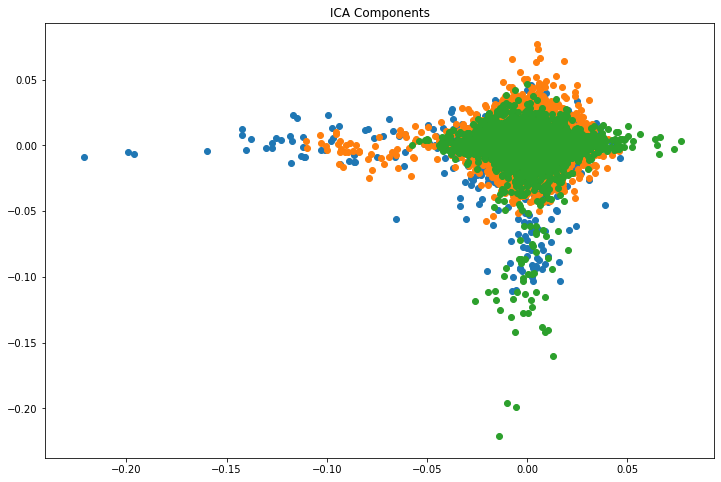

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8)) 
plt.title('ICA Components')
plt.scatter(X_train[:,0], X_train[:,1]) 
plt.scatter(X_train[:,1], X_train[:,2])
plt.scatter(X_train[:,2], X_train[:,0])



In [0]:
#linear Regression
from sklearn import linear_model

reg= linear_model.LinearRegression()
reg.fit(X_test,Y_test)
reg.score(X_test,Y_test)

0.9552782622082658

In [0]:
#train
reg.fit(X_train,Y_train)
reg.score(X_train,Y_train)

0.952804678225469

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


For Logistic Regression accuracy score is  0.947654656696125
For  Logistic Regression confusion_matrix is: 

 [[262   0   0   0   0   0]
 [  3 244  37   0   0   0]
 [  0   9 267   0   0   0]
 [  0   0   0 239   0   1]
 [  1   0   2   4 170   1]
 [  0   1   0  17   1 212]]
For  Logistic Regression Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       262
           1       0.96      0.86      0.91       284
           2       0.87      0.97      0.92       276
           3       0.92      1.00      0.96       240
           4       0.99      0.96      0.97       178
           5       0.99      0.92      0.95       231

    accuracy                           0.95      1471
   macro avg       0.95      0.95      0.95      1471
weighted avg       0.95      0.95      0.95      1471



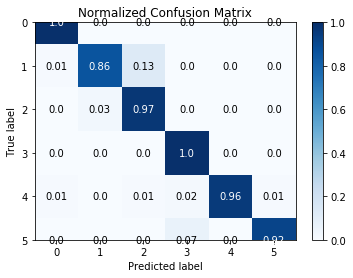

In [0]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=42)
classifier.fit(X_train,Y_train)
pred1 = classifier.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import scikitplot as skplt
print('For Logistic Regression accuracy score is ',accuracy_score(Y_test,pred1))
print('For  Logistic Regression confusion_matrix is: \n\n',confusion_matrix(Y_test,pred1))
print ('For  Logistic Regression Classification Report: \n\n',classification_report(Y_test,pred1))
skplt.metrics.plot_confusion_matrix(Y_test, pred1, normalize=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


75.66 %
[[242   8   9   0   2   1]
 [ 25 198  52   6   0   3]
 [ 28  38 197   8   2   3]
 [  1   1   0 190  27  21]
 [  2   1   1  27 134  13]
 [  0   4   3  42  30 152]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       262
           1       0.79      0.70      0.74       284
           2       0.75      0.71      0.73       276
           3       0.70      0.79      0.74       240
           4       0.69      0.75      0.72       178
           5       0.79      0.66      0.72       231

    accuracy                           0.76      1471
   macro avg       0.75      0.76      0.75      1471
weighted avg       0.76      0.76      0.75      1471



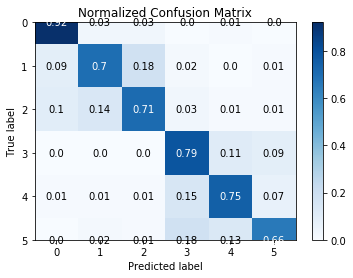

In [0]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = "most_frequent", axis = 0)
imp = imp.fit(X_train)
X_train_imp = imp.transform(X_train)
fit_random_forest = RandomForestClassifier(random_state = 42)
fit_random_forest.fit(X_train_imp, Y_train);
X_test_imp = imp.transform(X_test)
y_predicted = fit_random_forest.predict(X_test_imp)
accuracy = accuracy_score(Y_test, y_predicted)*100
print(round(accuracy, 2), '%')
print(confusion_matrix(Y_test, y_predicted))
print (classification_report(Y_test,y_predicted))
skplt.metrics.plot_confusion_matrix(Y_test,y_predicted, normalize=True)
plt.show()

In [0]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(X_train, Y_train) 
  
# making predictions on the testing set 
y_pred_nb = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred_nb)*100)

Gaussian Naive Bayes model accuracy(in %): 81.91706322229776


[[217   9  35   0   1   0]
 [ 20 169  93   0   2   0]
 [ 12  23 238   0   3   0]
 [  1   0   0 207  21  11]
 [  0   0   0   2 158  18]
 [  0   0   0   1  14 216]]


              precision    recall  f1-score   support

           0       0.87      0.83      0.85       262
           1       0.84      0.60      0.70       284
           2       0.65      0.86      0.74       276
           3       0.99      0.86      0.92       240
           4       0.79      0.89      0.84       178
           5       0.88      0.94      0.91       231

    accuracy                           0.82      1471
   macro avg       0.84      0.83      0.83      1471
weighted avg       0.83      0.82      0.82      1471

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       262
           1       0.84      0.60      0.70       284
           2       0.65      0.86      0.74       276
           3       0.99      0.86      0.92       240
           4       0.

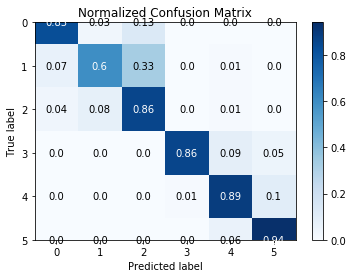

In [0]:
print(confusion_matrix(Y_test, y_pred_nb))
print("\n")
print(classification_report(Y_test, y_pred_nb))
print(classification_report(Y_test, y_pred_nb))
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_nb, normalize=True)
plt.show()

In [0]:
#SVM
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import math 
import io
import scikitplot as skplt
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
                    

In [0]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_s, Y_train)
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 
# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_s)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.9887774188063254 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [0]:
print("Training set score for SVM: %f" % final_model.score(X_train_s , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_s  , Y_test ))

svm_model.score

Training set score for SVM: 0.997960
Testing  set score for SVM: 0.984364


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

[[262   0   0   0   0   0]
 [  0 274  10   0   0   0]
 [  0  13 263   0   0   0]
 [  0   0   0 240   0   0]
 [  0   0   0   0 178   0]
 [  0   0   0   0   0 231]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       0.95      0.96      0.96       284
           2       0.96      0.95      0.96       276
           3       1.00      1.00      1.00       240
           4       1.00      1.00      1.00       178
           5       1.00      1.00      1.00       231

    accuracy                           0.98      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.98      0.98      0.98      1471

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       0.95      0.96      0.96       284
           2       0.96      0.95      0.96       276
           3       1.00      1.00      1.00       240
           4       1.

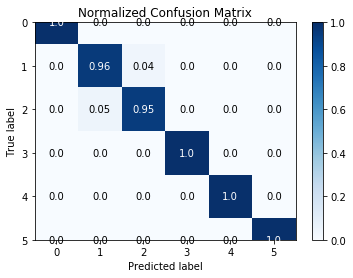

In [0]:
print(confusion_matrix(Y_test,Y_pred))
print("\n")
print(classification_report(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=True)
plt.show()

[[248   7   7   0   0   0]
 [  3 255  26   0   0   0]
 [  3  19 254   0   0   0]
 [  0   2   1 236   1   0]
 [  0   1   8   5 160   4]
 [  0   0   2   3   1 225]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       262
           1       0.90      0.90      0.90       284
           2       0.85      0.92      0.89       276
           3       0.97      0.98      0.98       240
           4       0.99      0.90      0.94       178
           5       0.98      0.97      0.98       231

    accuracy                           0.94      1471
   macro avg       0.94      0.94      0.94      1471
weighted avg       0.94      0.94      0.94      1471



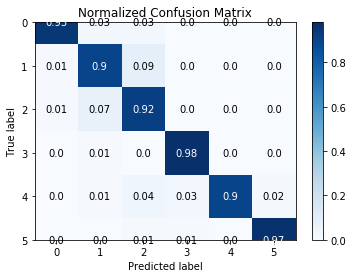

In [0]:
#kNN

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train_s, Y_train)
Y_pred = classifier.predict(X_test_s)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
plt.show()
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=True)
plt.show()

In [0]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(Y_test, Y_pred)*100,'%')
#print (((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% of testing data was classified correctly')
print(classification_report(Y_test,Y_pred))

93.67777022433718 %
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       262
           1       0.90      0.90      0.90       284
           2       0.85      0.92      0.89       276
           3       0.97      0.98      0.98       240
           4       0.99      0.90      0.94       178
           5       0.98      0.97      0.98       231

    accuracy                           0.94      1471
   macro avg       0.94      0.94      0.94      1471
weighted avg       0.94      0.94      0.94      1471



Text(0, 0.5, 'Mean Error')

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

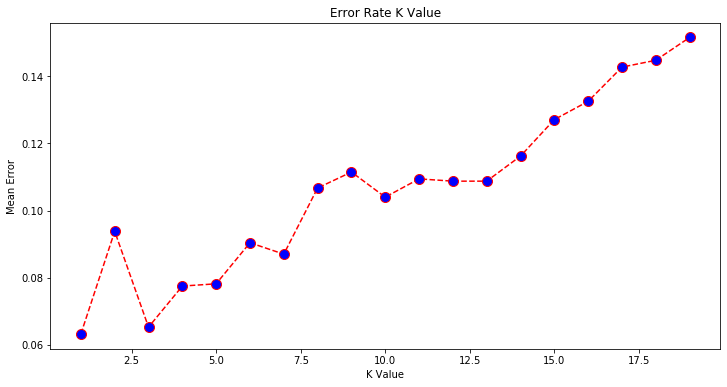

In [0]:
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_s, Y_train)
    pred_i = knn.predict(X_test_s)
    error.append(np.mean(pred_i != Y_test))
    plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')